In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
''' reading train and test data '''
raw = pd.read_csv('/content/drive/MyDrive/disease.csv')


In [ ]:
''' displaying first five rows of train_df '''
raw.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
raw_2 = raw.drop(columns= ['Disease'])
raw_2

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(raw.loc[1].values)

['Fungal infection' ' skin_rash' ' nodal_skin_eruptions'
 ' dischromic _patches' nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]


In [ ]:
unique_values = pd.unique(raw_2.values.ravel())

# Print all the unique values
print("Unique values across the entire dataset:")
print(len(unique_values))

print(unique_values)


Unique values across the entire dataset:
132
['itching' ' skin_rash' ' nodal_skin_eruptions' ' dischromic _patches' nan
 ' continuous_sneezing' ' shivering' ' chills' ' watering_from_eyes'
 ' stomach_pain' ' acidity' ' ulcers_on_tongue' ' vomiting' ' cough'
 ' chest_pain' ' yellowish_skin' ' nausea' ' loss_of_appetite'
 ' abdominal_pain' ' yellowing_of_eyes' ' burning_micturition'
 ' spotting_ urination' ' passage_of_gases' ' internal_itching'
 ' indigestion' ' muscle_wasting' ' patches_in_throat' ' high_fever'
 ' extra_marital_contacts' ' fatigue' ' weight_loss' ' restlessness'
 ' lethargy' ' irregular_sugar_level' ' blurred_and_distorted_vision'
 ' obesity' ' excessive_hunger' ' increased_appetite' ' polyuria'
 ' sunken_eyes' ' dehydration' ' diarrhoea' ' breathlessness'
 ' family_history' ' mucoid_sputum' ' headache' ' dizziness'
 ' loss_of_balance' ' lack_of_concentration' ' stiff_neck' ' depression'
 ' irritability' ' visual_disturbances' ' back_pain' ' weakness_in_limbs'
 ' neck_

In [ ]:
df = pd.DataFrame(columns=unique_values)
df['Disease'] = []
df

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,ulcers_on_tongue,vomiting,cough,chest_pain,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,burning_micturition,spotting_ urination,passage_of_gases,internal_itching,indigestion,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,fatigue,weight_loss,restlessness,lethargy,irregular_sugar_level,blurred_and_distorted_vision,obesity,excessive_hunger,increased_appetite,polyuria,sunken_eyes,dehydration,diarrhoea,breathlessness,family_history,mucoid_sputum,headache,dizziness,loss_of_balance,lack_of_concentration,stiff_neck,depression,irritability,visual_disturbances,back_pain,weakness_in_limbs,neck_pain,weakness_of_one_body_side,altered_sensorium,dark_urine,sweating,muscle_pain,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body,joint_pain,pain_behind_the_eyes,constipation,toxic_look_(typhos),belly_pain,yellow_urine,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,acute_liver_failure,swelling_of_stomach,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload,phlegm,blood_in_sputum,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,loss_of_smell,fast_heart_rate,rusty_sputum,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,cramps,bruising,swollen_legs,swollen_blood_vessels,prominent_veins_on_calf,weight_gain,cold_hands_and_feets,mood_swings,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,abnormal_menstruation,muscle_weakness,anxiety,slurred_speech,palpitations,drying_and_tingling_lips,knee_pain,hip_joint_pain,swelling_joints,painful_walking,movement_stiffness,spinning_movements,unsteadiness,pus_filled_pimples,blackheads,scurring,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease


In [ ]:
for i in range (0,4920):
  for col in df.columns:
    if col in raw.loc[i].values:
      df.loc[i, col] = 1
    else:
      df.loc[i, col] = 0
df['Disease'] = raw['Disease']
df

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,ulcers_on_tongue,vomiting,cough,chest_pain,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,burning_micturition,spotting_ urination,passage_of_gases,internal_itching,indigestion,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,fatigue,weight_loss,restlessness,lethargy,irregular_sugar_level,blurred_and_distorted_vision,obesity,excessive_hunger,increased_appetite,polyuria,sunken_eyes,dehydration,diarrhoea,breathlessness,family_history,mucoid_sputum,headache,dizziness,loss_of_balance,lack_of_concentration,stiff_neck,depression,irritability,visual_disturbances,back_pain,weakness_in_limbs,neck_pain,weakness_of_one_body_side,altered_sensorium,dark_urine,sweating,muscle_pain,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body,joint_pain,pain_behind_the_eyes,constipation,toxic_look_(typhos),belly_pain,yellow_urine,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,acute_liver_failure,swelling_of_stomach,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload,phlegm,blood_in_sputum,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,loss_of_smell,fast_heart_rate,rusty_sputum,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,cramps,bruising,swollen_legs,swollen_blood_vessels,prominent_veins_on_calf,weight_gain,cold_hands_and_feets,mood_swings,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,abnormal_menstruation,muscle_weakness,anxiety,slurred_speech,palpitations,drying_and_tingling_lips,knee_pain,hip_joint_pain,swelling_joints,painful_walking,movement_stiffness,spinning_movements,unsteadiness,pus_filled_pimples,blackheads,scurring,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4914,0,

In [ ]:
df

Index(['itching', ' skin_rash', ' nodal_skin_eruptions',
       ' dischromic _patches', <NA>, ' continuous_sneezing', ' shivering',
       ' chills', ' watering_from_eyes', ' stomach_pain',
       ...
       ' foul_smell_of urine', ' continuous_feel_of_urine', ' skin_peeling',
       ' silver_like_dusting', ' small_dents_in_nails', ' inflammatory_nails',
       ' blister', ' red_sore_around_nose', ' yellow_crust_ooze', 'Disease'],
      dtype='string', length=133)

In [ ]:
print("Shape of df: ", df.shape)

Shape of df:  (4919, 133)


In [ ]:
print("Checking null values: ", df.isnull().sum().any())

Checking null values:  False


In [ ]:
''' barplot '''

for i in df.columns :
    fig, ax = plt.subplots(figsize=(10, 5))
    bar = df.groupby(i).size().plot(kind='bar',  ax=ax)
    plt.xticks(rotation=0)
    fig.suptitle("Count of Symptom \"" + str(i) + "\"");

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
''' checking unique catergories '''
df['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [ ]:
''' value counts of prognosis '''
df.Disease.value_counts()

,count
Disease,
Fungal infection,120
Hepatitis C,120
Hepatitis E,120
Alcoholic hepatitis,120
Tuberculosis,120
Common Cold,120
Pneumonia,120
Dimorphic hemmorhoids(piles),120
Heart attack,120


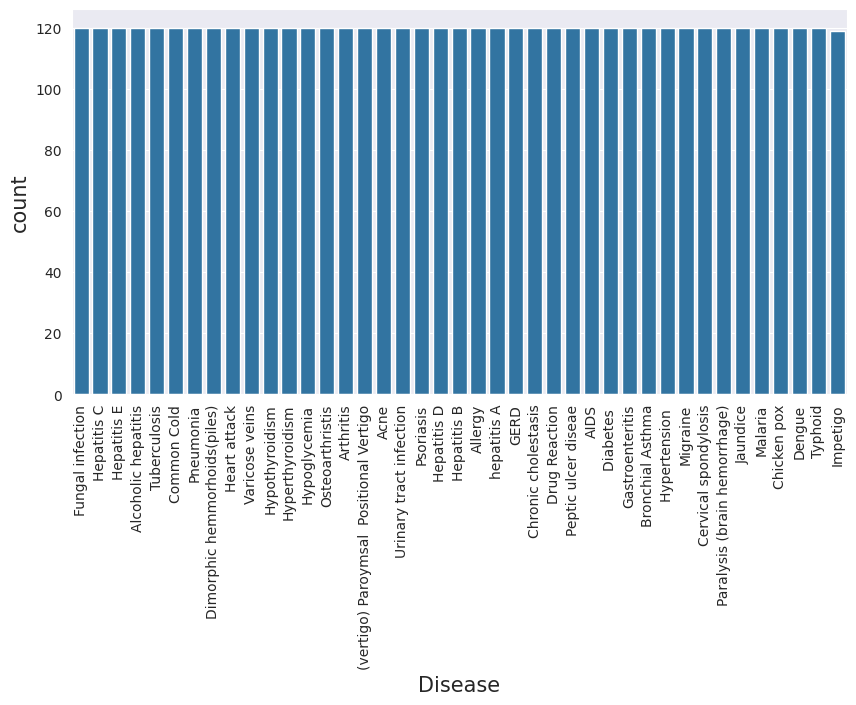

In [ ]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.barplot(df.Disease.value_counts());
plt.xlabel('Disease', fontsize=15)
plt.ylabel('count', fontsize=15);

In [ ]:
''' column names '''
list(df.columns)

['itching',
 ' skin_rash',
 ' nodal_skin_eruptions',
 ' dischromic _patches',
 nan,
 ' continuous_sneezing',
 ' shivering',
 ' chills',
 ' watering_from_eyes',
 ' stomach_pain',
 ' acidity',
 ' ulcers_on_tongue',
 ' vomiting',
 ' cough',
 ' chest_pain',
 ' yellowish_skin',
 ' nausea',
 ' loss_of_appetite',
 ' abdominal_pain',
 ' yellowing_of_eyes',
 ' burning_micturition',
 ' spotting_ urination',
 ' passage_of_gases',
 ' internal_itching',
 ' indigestion',
 ' muscle_wasting',
 ' patches_in_throat',
 ' high_fever',
 ' extra_marital_contacts',
 ' fatigue',
 ' weight_loss',
 ' restlessness',
 ' lethargy',
 ' irregular_sugar_level',
 ' blurred_and_distorted_vision',
 ' obesity',
 ' excessive_hunger',
 ' increased_appetite',
 ' polyuria',
 ' sunken_eyes',
 ' dehydration',
 ' diarrhoea',
 ' breathlessness',
 ' family_history',
 ' mucoid_sputum',
 ' headache',
 ' dizziness',
 ' loss_of_balance',
 ' lack_of_concentration',
 ' stiff_neck',
 ' depression',
 ' irritability',
 ' visual_disturbanc

In [ ]:
X = df.drop(columns=['Disease'])
y = df['Disease']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
''' Decision Tree '''
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
dt_clf = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=2)

''' fit on data '''
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

In [ ]:
''' prediction '''
pred = dt_clf.predict(X_test)

In [ ]:
pd.DataFrame({
    'Actual': y_test,
    'Predicted': pred
}).head(10)

,Actual,Predicted
373,Acne,Acne
4915,(vertigo) Paroymsal Positional Vertigo,(vertigo) Paroymsal Positional Vertigo
4344,Psoriasis,Psoriasis
3554,Dimorphic hemmorhoids(piles),Dimorphic hemmorhoids(piles)
3298,Typhoid,Typhoid
926,Hypertension,Hypertension
2138,Gastroenteritis,Gastroenteritis
765,Arthritis,Arthritis
1697,Peptic ulcer diseae,Peptic ulcer diseae
4192,Hypertension,Hypertension


In [ ]:
''' accuracy_score '''
print("Accuracy Score: ", accuracy_score(y_test, pred))

Accuracy Score:  1.0


In [ ]:
''' Random Forest Classifier '''
rf_clf = RandomForestClassifier(criterion='entropy', min_samples_leaf=2)

''' fit on data '''
rf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2)

In [ ]:
''' prediction '''
pred_rf = rf_clf.predict(X_test)

In [ ]:
''' accuracy_score '''
print("Accuracy Score: ", accuracy_score(y_test, pred_rf))

Accuracy Score:  1.0


In [ ]:
pd.DataFrame({
    'Actual': y_test,
    'Predicted': pred_rf
}).head(10)

,Actual,Predicted
373,Acne,Acne
4915,(vertigo) Paroymsal Positional Vertigo,(vertigo) Paroymsal Positional Vertigo
4344,Psoriasis,Psoriasis
3554,Dimorphic hemmorhoids(piles),Dimorphic hemmorhoids(piles)
3298,Typhoid,Typhoid
926,Hypertension,Hypertension
2138,Gastroenteritis,Gastroenteritis
765,Arthritis,Arthritis
1697,Peptic ulcer diseae,Peptic ulcer diseae
4192,Hypertension,Hypertension


In [ ]:
# MLP
mlp_clf = MLPClassifier()


mlp_clf.fit(X_train, y_train)

MLPClassifier()

In [ ]:
# prediction
pred_mlp = mlp_clf.predict(X_test)

In [ ]:
# accuracy_score
print("Accuracy Score: ", accuracy_score(y_test, pred_mlp))

Accuracy Score:  1.0


In [ ]:
pd.DataFrame({
        'Actual': y_test,
        'Predicted': pred_mlp
}).head(10)

,Actual,Predicted
373,Acne,Acne
4915,(vertigo) Paroymsal Positional Vertigo,(vertigo) Paroymsal Positional Vertigo
4344,Psoriasis,Psoriasis
3554,Dimorphic hemmorhoids(piles),Dimorphic hemmorhoids(piles)
3298,Typhoid,Typhoid
926,Hypertension,Hypertension
2138,Gastroenteritis,Gastroenteritis
765,Arthritis,Arthritis
1697,Peptic ulcer diseae,Peptic ulcer diseae
4192,Hypertension,Hypertension
